In [91]:
from datetime import datetime
from elasticsearch import Elasticsearch
from sklearn.datasets import fetch_20newsgroups
print(1)

1


In [92]:
es = Elasticsearch()

doc = {
    'author': 'kimchy',
    'text': 'Elasticsearch: cool. bonsai cool.',

}
res = es.index(index="test-index", doc_type='tweet', id=1, body=doc)



In [90]:
newsgroups_train = fetch_20newsgroups(subset='train')
text_list = newsgroups_train.data
print(type(text_list))
print(text_list[0])
print(text_list[1])
print(text_list[2])


for i in range(len(text_list)):
    print(i)
    
    doc_i = {'doc_id': i,'doc_text': text_list[i]}
    res = es.index(index="20NG-index", doc_type='news', id=i, body=doc_i)




    


<class 'list'>
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Ho

In [42]:
for i in range(len(text_list)):
    print(i)
    
    doc_i = {'doc_id': i,'doc_text': text_list[i]}
    res = es.index(index="20NG-index", doc_type='news', id=i, body=doc_i)

PUT http://localhost:9200/20NG-index/news/0 [status:400 request:0.017s]


0


RequestError: TransportError(400, 'invalid_index_name_exception', 'Invalid index name [20NG-index], must be lowercase')

In [83]:
t = []
t.append( [1,2])
t.append([3,4])

In [ ]:
t=['coalition members congress announc','wednesday plan sue census bureau effort', 'force agency delete illegal aliens count 1990','40 members house joined federation american']

## P4

In [3]:
from random import random
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal as mn
from scipy.stats import multivariate_normal
import scipy.stats

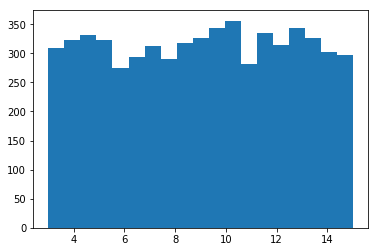

In [4]:
def uniform(a,b,n):
    return [random()*(b-a)+a for i in range(n)]

plt.hist(uniform(3,15,6000), bins='auto')
plt.show()

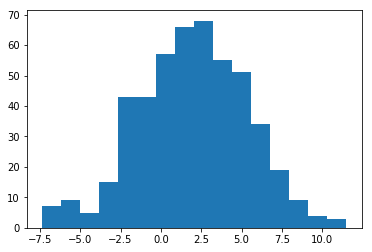

In [5]:
## implementing using reject sampling
def gaussian(mu, sigma, n):
    x = uniform(mu-3*sigma, mu+3*sigma, n)
    y = uniform(0, 1, n)
    x_accept = []
    for i in range(len(x)):
        if y[i]> scipy.stats.norm(mu, sigma).pdf(x[i]):
            continue
            #print("skip")
        else:
            x_accept.append(x[i])
            
    return x_accept
t = gaussian(2.0,3.5,10000)
plt.hist(t, bins='auto')
plt.show()
            

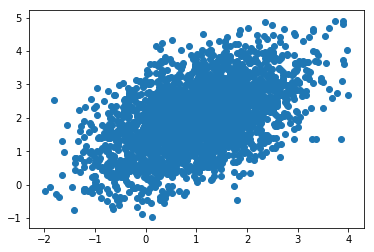

In [6]:
## implementing using reject sampling
from scipy.stats import multivariate_normal
def two_gaussian(mu_list, sigma_list, n):
    x = uniform(mu_list[0]-3*sigma_list[0][0], mu_list[0]+3*sigma_list[0][0], n)
    y = uniform(mu_list[1]-3*sigma_list[1][1], mu_list[1]+3*sigma_list[1][1], n)

    z = uniform(0, 1, n)
    
    x_y_accept = []
    for i in range(len(x)):
        if z[i]> multivariate_normal(mu_list, sigma_list).pdf([x[i],y[i]]):
            continue
            #print("skip")
        else:
            x_y_accept.append([x[i],y[i]])
            
    return x_y_accept

t = two_gaussian([1.0, 2.0],[[1.0, 0.5], [0.5, 1]],100000)
x_list = []
y_list = []
for i in range(len(t)):
    x_list.append(t[i][0])
    y_list.append(t[i][1])

plt.scatter(x_list, y_list)
plt.show()


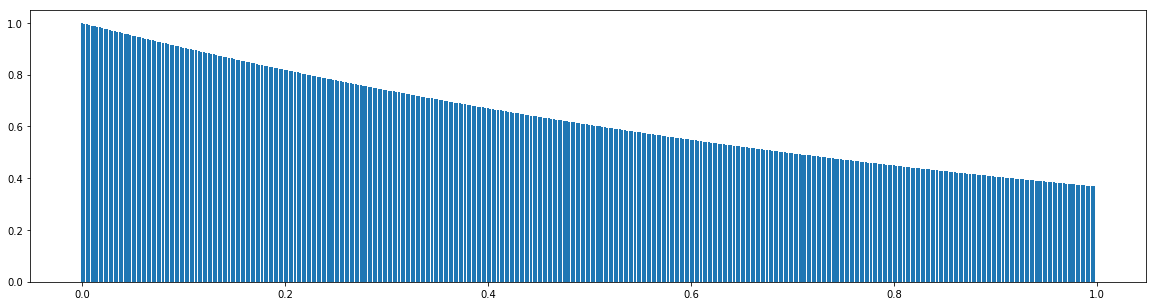

In [15]:
import numpy as np
lst = np.array(range(0,400,1))/400
## Calculate the exponential of all elements in the input array
height = np.exp(-lst)
fig = plt.figure(figsize=(20,5))
plt.bar(lst, height, width = 0.002)
plt.show()

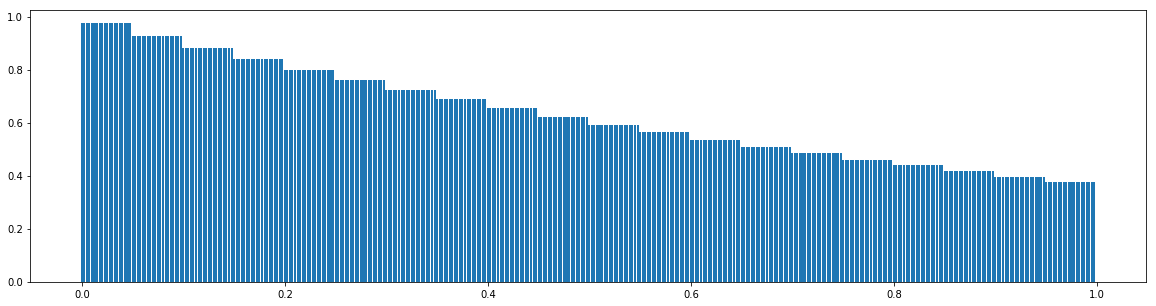

In [11]:
height2 = []
#wr = []
for i in range(0,400,20):
   # wr.append(i)
    height2 += [np.mean(height[i:i+20])]*20
fig = plt.figure(figsize=(20,5))
plt.bar(lst, height2, width = 0.002)
plt.show()

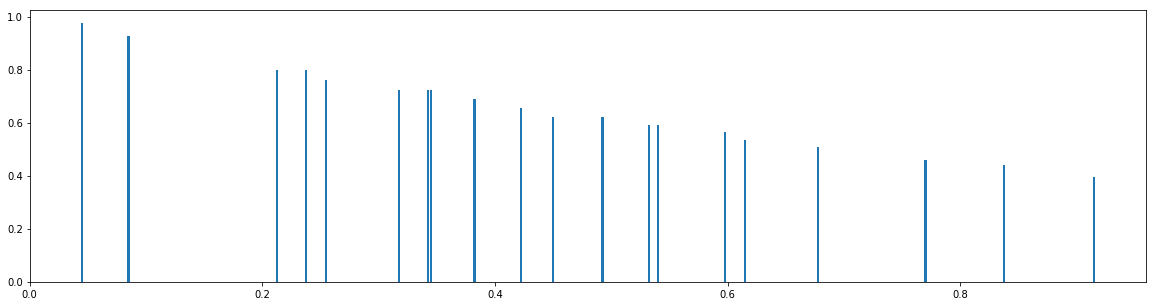

In [16]:
prob = np.cumsum(height2/sum(height2))
sample = []
xsample = []
for i in range(20):
    ran = random()
    # when selecting each sample out of the 20 bucket,decide which bucket that sample fall in, and then get one sample from that bucket
    for j in range(len(prob)):
        if ran < prob[j]:
            #print(prob[j])
            xsample.append(j/400)
            sample.append(height2[j])
            break
fig = plt.figure(figsize=(20,5))
plt.bar(xsample, sample, width = 0.002)
plt.show()

In [118]:
from numpy.random import multivariate_normal as mn
a = mn([1,1],[[1,0],[0,1]])

In [159]:
t =np.array([[1,2],[3,4]])

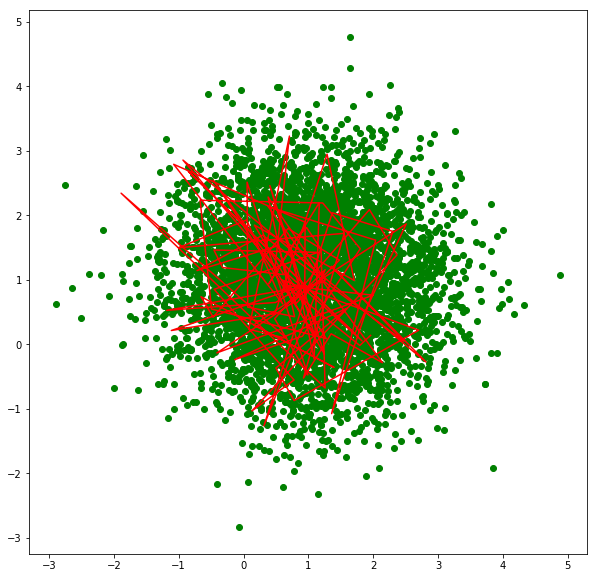

In [18]:
def p_x_given_y(y, mu, sigma):
    mu = mu[0] + sigma[1][0]/ sigma[0][0] * (y - mu[1])
    sigma = sigma[0][0] - sigma[1][0] / sigma[1][1] * sigma[1][0]
    return np.random.normal(mu, sigma)


def p_y_given_x(x, mu, sigma):
    mu = mu[1] + sigma[0][1] / sigma[1][1] * (x - mu[0])
    sigma = sigma[1][1] - sigma[0][1] / sigma[0][0] * sigma[0][1]
    return np.random.normal(mu, sigma)


def gibbs_sampling(mu, sigma, num):
    samples = np.zeros((num, 2))
    y = random() * 10

    for i in range(num):
        x = p_x_given_y(y, mu, sigma)
        y = p_y_given_x(x, mu, sigma)
        samples[i, :] = [x, y]

    return samples

norm_x = []
norm_y = []
fig = plt.figure(figsize=(10,10))
for i in range(5000):
    a = mn([1,1],[[1,0],[0,1]])
    norm_x.append(a[0])
    norm_y.append(a[1])

steps = gibbs_sampling([1,1], [[1,0],[0,1]], 100)
steps_x = list(zip(*steps))[0]
steps_y = list(zip(*steps))[1]
fig = plt.figure(figsize=(10,10))
plt.plot(steps_x,steps_y, color = "red")
plt.scatter(norm_x,norm_y,color = "green")
plt.show()


In [139]:
import numpy as np
t = np.zeros((4, 2))

In [151]:
samples = np.zeros((100, 3))
#y = random() * 10

for i in range(100):
    x = 2
    y = 3
    z = 5
    samples[i, :] = [x, y,z]

In [152]:
samples

array([[ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.,  5.],
       [ 2.,  3.

In [190]:
import re
text = ["This", "is", "an", "email" ,"from an e-mail" ,"due1 ", "to a bad ","temail"]
print([w for w in text if re.search('[A-Z]+', w)])

['This']


In [193]:
import os
os.listdir('.')

['.ipynb_checkpoints', 'Untitled.ipynb']

In [194]:
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

[('process', 'ing')]